In [40]:
# Importing Neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# from imblearn.over_sampling import RandomOverSampler
        
# Models
from sklearn.linear_model import LinearRegression,  LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
# from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn import svm

# Metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder

df = pd.read_csv(r'C:\Users\arjd2\OneDrive\Documents\GitHub\JPMC_Quant_Research\task3\data\loan_data.csv', low_memory=False)
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [41]:
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [42]:
df.isnull().sum().sort_values(ascending=False)

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [43]:
df.dtypes.value_counts()

int64      5
float64    3
Name: count, dtype: int64

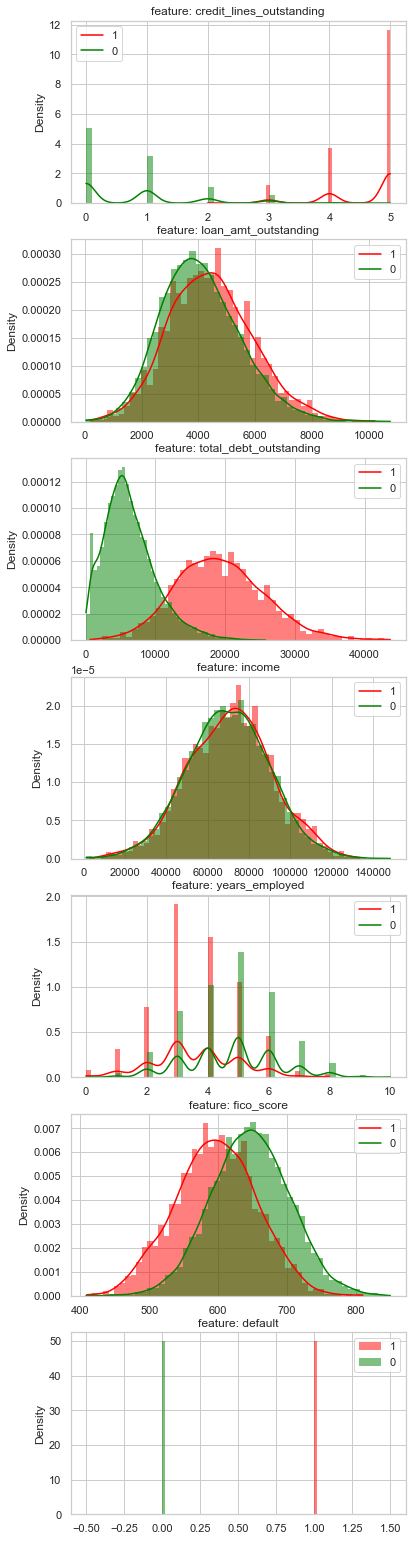

In [44]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(33, 1)
plt.figure(figsize=(6,33*4))

for i, col in enumerate(df[df.iloc[:,1:8].columns]):
    ax5 = plt.subplot(gs[i])
    sns.histplot(df[col][df.default == 1], bins=50, color="red", kde=True,stat="density", linewidth=0)
    sns.histplot(df[col][df.default == 0], bins=50, color='green', kde=True,stat="density", linewidth=0)
    ax5.set_xlabel('')
    plt.legend(["1", "0"])
    ax5.set_title('feature: ' + str(col))
    
plt.show()

In [45]:
X = df.drop(columns=['default'])
Y = df.iloc[:,-1]

In [46]:
X.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631


In [47]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [48]:
# Select numerical and categorical columns
num_cols = X.select_dtypes(include=['float', 'int']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','bool']).columns.tolist()

# Perform MinMax scaling on numerical columns
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Perform label encoding on categorical columns
encoder = LabelEncoder()
for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])

# Label encoding Y
y = encoder.fit_transform(Y)

# Print the updated dataset
X.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,0.894191,0.0,0.483447,0.088962,0.522612,0.5,0.445701
1,0.805330,1.0,0.178640,0.187761,0.173991,0.2,0.371041
2,0.156979,0.0,0.309815,0.045724,0.440036,0.4,0.438914
3,0.485739,0.0,0.440948,0.056579,0.497631,0.5,0.461538
4,0.462567,0.2,0.121362,0.039791,0.152283,0.6,0.504525


In [50]:
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
reg=RandomForestRegressor()
reg.fit(X,y)

RandomForestRegressor()

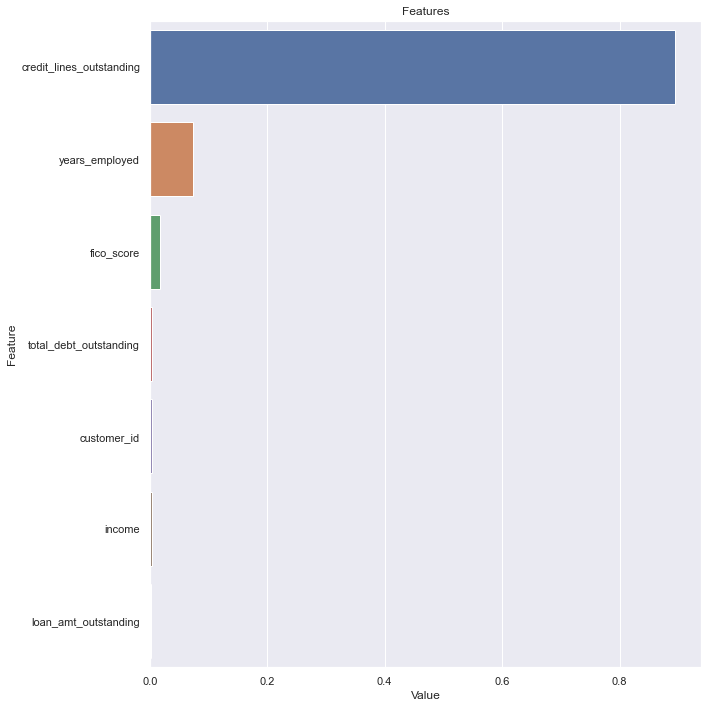

In [52]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(reg, X)

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression, f_regression, chi2, f_classif, mutual_info_classif # or another statistical test

# X is the feature matrix, y is the target vector
X_new=SelectKBest(score_func=f_regression,k=3).fit_transform(X,y)

In [56]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=1 - train_ratio, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [57]:
print("X Train:",X_train.shape)
print("X Validation:",X_val.shape)
print("X Test:",X_test.shape)

X Train: (7500, 3)
X Validation: (1500, 3)
X Test: (1000, 3)


In [58]:
# Helper functions

training_score1 = []
validation_score1 = []
testing_score1 = []
accuracy_score1 = []
precision_score1 = []
recall_score1 = []
f1_score1 = []
models1 = []
    
def get_predictions(clf, X_train, X_val, X_test, y_train, y_val,y_test,reg=False,binary = False, cat=False):
    # create classifier
    clf = clf
    
    models1.append(clf)
    
    # fit it to training data
    clf.fit(X_train,y_train)
    
    # predict using test data
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    y_pred_test = clf.predict(X_test)
    
    if reg == True:
        a = r2_score(y_train,y_pred_train)*100
        b = r2_score(y_val,y_pred_val)*100
        c = r2_score(y_test,y_pred_test)*100
        training_score1.append(a)
        validation_score1.append(b)
        testing_score1.append(c)
    
        print(f"r2_Score of {clf} model on Training Data is:",a)
        print(f"r2_Score of {clf} model on Validation Data is:",b)
        print(f"r2_Score of {clf} model on Testing Data is:",c)
    
    if binary == True:
        target_names= ['cat1', 'cat2']
        
        # Compute predicted probabilities: y_pred_prob
        y_pred_train_prob = clf.predict_proba(X_train)
        y_pred_val_prob = clf.predict_proba(X_val)
        y_pred_test_prob = clf.predict_proba(X_test)
        
        acc = accuracy_score(y_test,y_pred_test)
        rec = recall_score(y_test,y_pred_test)
        prec = precision_score(y_test,y_pred_test)
        f1 = f1_score(y_test,y_pred_test)
        testing_score1.append(acc)
        
        print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_test)) 
        print("recall score: ", rec)
        print("precision score: ", prec)
        print("f1 score: ", )
        print("accuracy score: ", acc )
        print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_test_prob[:,1])))
        print(classification_report(y_test, y_pred_test, target_names=target_names))
        
        accuracy_score1.append(acc)
        precision_score1.append(prec)
        recall_score1.append(rec)
        f1_score1.append(f1)
        
    if cat == True:
        target_names= ['cat1', 'cat2','cat3','cat4']
        
        # Compute predicted probabilities: y_pred_prob
        y_pred_train_prob = clf.predict_proba(X_train)
        y_pred_val_prob = clf.predict_proba(X_val)
        y_pred_test_prob = clf.predict_proba(X_test)
        
        acc = accuracy_score(y_test,y_pred_test)
        
#         print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_test)) 
        print("accuracy score: ", acc )
        print(classification_report(y_test, y_pred_test, target_names=target_names))
        
        accuracy_score1.append(acc)

In [59]:
s = svm.SVC(probability=True)
get_predictions(s, X_train, X_val, X_test, y_train, y_val,y_test,binary=True)

test-set confusion matrix:
 [[820  11]
 [ 19 150]]
recall score:  0.8875739644970414
precision score:  0.9316770186335404
f1 score: 
accuracy score:  0.97
ROC AUC: 0.9881229572981863
              precision    recall  f1-score   support

        cat1       0.98      0.99      0.98       831
        cat2       0.93      0.89      0.91       169

    accuracy                           0.97      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.97      0.97      0.97      1000



In [60]:
rfc = RandomForestClassifier()
get_predictions(rfc, X_train, X_val, X_test, y_train, y_val,y_test,binary=True)

test-set confusion matrix:
 [[814  17]
 [ 14 155]]
recall score:  0.9171597633136095
precision score:  0.9011627906976745
f1 score: 
accuracy score:  0.969
ROC AUC: 0.9945812772805275
              precision    recall  f1-score   support

        cat1       0.98      0.98      0.98       831
        cat2       0.90      0.92      0.91       169

    accuracy                           0.97      1000
   macro avg       0.94      0.95      0.95      1000
weighted avg       0.97      0.97      0.97      1000



In [61]:
xgb = XGBClassifier()
get_predictions(xgb, X_train, X_val, X_test, y_train, y_val,y_test,binary=True)

test-set confusion matrix:
 [[818  13]
 [ 16 153]]
recall score:  0.9053254437869822
precision score:  0.9216867469879518
f1 score: 
accuracy score:  0.971
ROC AUC: 0.9957597248627519
              precision    recall  f1-score   support

        cat1       0.98      0.98      0.98       831
        cat2       0.92      0.91      0.91       169

    accuracy                           0.97      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.97      0.97      0.97      1000



In [62]:
models = ["SVM","Random Forest","XGBoost",]

comp = pd.DataFrame({"Algorithms":models,
                   "Accuracy":accuracy_score1,
                    "Precision":precision_score1,
                   "Recall":recall_score1})

comp

,Algorithms,Accuracy,Precision,Recall
0,SVM,0.970,0.931677,0.887574
1,Random Forest,0.969,0.901163,0.917160
2,XGBoost,0.971,0.921687,0.905325


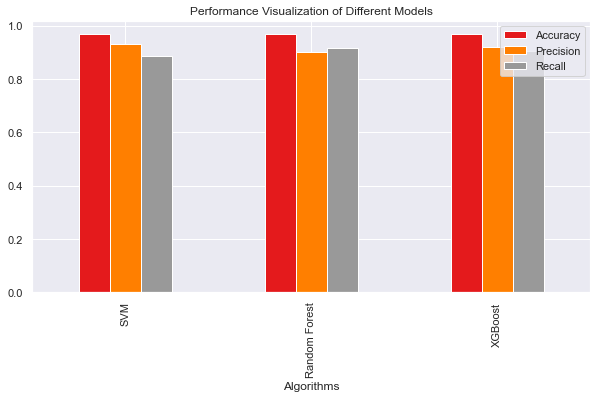

In [63]:
comp.plot(x="Algorithms",y=["Accuracy","Precision","Recall"], figsize=(10,5),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()